In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import time

from src.model import *

In [2]:
SPECTRA_DIR = 'Bruker_MPA/*'

AFSIS_PATH = Path('afsis/2009-2013/Dry_Chemistry/ICRAF/')

spectra_df = load_spectra_df(SPECTRA_DIR, AFSIS_PATH)


In [3]:
wet_chem_df = pd.read_csv('afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv')
wet_chem_df.head()

,SSN,Public,EC,ExAc,ExBas,M3 Al,M3 B,M3 Ca,M3 Cu,M3 Fe,M3 K,M3 Mg,M3 Mn,M3 Na,M3 P,M3 S,M3 Zn,PH,PSI
0,icr006475,True,0.053,2.56,2.744241,1095.0,0.3337,207.1,1.3150,153.70,306.30,89.5,9.266,42.71,4.495,18.960,2.825,4.682,67.052495
1,icr006586,True,0.193,0.59,16.797753,1165.0,0.7899,1665.0,2.8140,126.80,1186.00,636.7,254.700,40.83,12.510,13.600,1.952,7.062,30.420552
2,icr007929,True,0.305,0.19,16.503619,727.6,0.6142,2518.0,0.2496,260.40,72.57,428.5,35.820,42.94,21.090,14.810,2.742,7.114,60.506163
3,icr008008,True,0.053,0.48,6.302775,1458.0,0.3603,734.3,1.3690,134.10,274.60,222.5,29.110,20.73,109.200,11.400,0.980,5.650,51.470143
4,icr010198,True,0.032,1.05,2.390303,2166.0,0.0100,261.8,1.6860,97.49,91.76,76.5,375.200,49.31,3.958,5.281,1.258,5.501,247.626533


In [4]:
wet_chem_df.columns

Index(['SSN', 'Public', 'EC', 'ExAc', 'ExBas', 'M3 Al', 'M3 B', 'M3 Ca',
       'M3 Cu', 'M3 Fe', 'M3 K', 'M3 Mg', 'M3 Mn', 'M3 Na', 'M3 P', 'M3 S',
       'M3 Zn', 'PH', 'PSI'],
      dtype='object')

In [5]:
WET_CHEM_PATH = 'afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv'
elements = ['EC', 'M3 Ca', 'M3 K', 'M3 Mg', 'M3 P', 'PH']
columns_to_load = elements + ['SSN']


wet_chem_df = pd.read_csv(WET_CHEM_PATH, index_col='SSN', usecols=columns_to_load)

In [6]:
data_df = spectra_df.merge(wet_chem_df, left_index=True, right_index=True)


In [7]:
contains_nan = data_df.isnull().values.sum()
contains_nan

0

In [8]:
data_df

,12493.177,12489.320,12485.463,12481.606,12477.749,12473.892,12470.034,12466.177,12462.320,12458.463,...,3610.254,3606.397,3602.540,3598.683,EC,M3 Ca,M3 K,M3 Mg,M3 P,PH
icr049735,0.765804,0.765579,0.776812,0.795354,0.815153,0.827822,0.823997,0.810204,0.802608,0.806628,...,2.801358,2.664036,2.955150,2.821408,3.120,1100.00,1440.000,2250.000,20.100,5.280
icr033851,0.781866,0.782740,0.778067,0.776011,0.785837,0.794327,0.795452,0.796135,0.795599,0.795504,...,2.363049,2.424301,2.460464,2.437714,0.381,4898.32,1311.000,1068.000,3.200,7.867
icr068419,0.462182,0.459072,0.460319,0.461889,0.461745,0.461250,0.464106,0.470280,0.473516,0.472700,...,2.471763,2.745914,2.518233,2.416593,0.072,589.00,54.500,60.200,7.590,5.490
icr010078,0.900252,0.889631,0.893853,0.907193,0.921731,0.927977,0.921417,0.911963,0.908837,0.901939,...,2.642620,2.516314,2.375122,2.418391,0.034,466.20,71.800,106.500,11.180,5.642
icr075696,0.658960,0.654330,0.662424,0.672969,0.670191,0.663969,0.674582,0.691545,0.692512,0.682609,...,2.149735,2.193754,2.258132,2.280757,0.037,389.00,60.800,46.300,5.670,6.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icr049317,0.577725,0.585054,0.594410,0.599507,0.596028,0.589259,0.583887,0.578564,0.574233,0.576303,...,2.379056,3.142864,3.147451,3.099391,0.053,392.00,49.000,73.700,7.710,6.500
icr030368,0.301494,0.300201,0.299240,0.299279,0.302239,0.304967,0.305884,0.306842,0.306473,0.304401,...,2.147911,2.130198,2.207439,2.265409,0.165,33130.00,55.360,558.000,0.554,8.516
icr033545,0.417591,0.419255,0.421359,0.418838,0.412399,0.409302,0.412396,0.418643,0.422270,0.421899,...,2.640629,2.687847,2.946014,2.619882,0.281,10888.30,1239.000,607.000,11.523,8.544
icr075607,0.339942,0.339147,0.341375,0.342699,0.343420,0.345608,0.346978,0.346391,0.346559,0.345918,...,2.161024,2.271009,2.336334,2.271137,0.056,324.00,78.400,60.800,55.000,6.230


In [9]:
y = data_df[elements]
y

,EC,M3 Ca,M3 K,M3 Mg,M3 P,PH
icr049735,3.120,1100.00,1440.000,2250.000,20.100,5.280
icr033851,0.381,4898.32,1311.000,1068.000,3.200,7.867
icr068419,0.072,589.00,54.500,60.200,7.590,5.490
icr010078,0.034,466.20,71.800,106.500,11.180,5.642
icr075696,0.037,389.00,60.800,46.300,5.670,6.430
...,...,...,...,...,...,...
icr049317,0.053,392.00,49.000,73.700,7.710,6.500
icr030368,0.165,33130.00,55.360,558.000,0.554,8.516
icr033545,0.281,10888.30,1239.000,607.000,11.523,8.544
icr075607,0.056,324.00,78.400,60.800,55.000,6.230


In [10]:
X = pd.DataFrame.drop(data_df, columns=elements)
X_columns = X.columns
X

,12493.177,12489.320,12485.463,12481.606,12477.749,12473.892,12470.034,12466.177,12462.320,12458.463,...,3633.397,3629.540,3625.683,3621.826,3617.969,3614.111,3610.254,3606.397,3602.540,3598.683
icr049735,0.765804,0.765579,0.776812,0.795354,0.815153,0.827822,0.823997,0.810204,0.802608,0.806628,...,2.483031,2.416881,2.448243,2.666757,2.836452,2.845037,2.801358,2.664036,2.955150,2.821408
icr033851,0.781866,0.782740,0.778067,0.776011,0.785837,0.794327,0.795452,0.796135,0.795599,0.795504,...,2.456504,2.420501,2.298543,2.164866,2.128170,2.226499,2.363049,2.424301,2.460464,2.437714
icr068419,0.462182,0.459072,0.460319,0.461889,0.461745,0.461250,0.464106,0.470280,0.473516,0.472700,...,2.486014,2.448970,2.406921,2.314077,2.269487,2.307636,2.471763,2.745914,2.518233,2.416593
icr010078,0.900252,0.889631,0.893853,0.907193,0.921731,0.927977,0.921417,0.911963,0.908837,0.901939,...,2.690404,2.719710,2.717677,2.622466,2.596959,2.621600,2.642620,2.516314,2.375122,2.418391
icr075696,0.658960,0.654330,0.662424,0.672969,0.670191,0.663969,0.674582,0.691545,0.692512,0.682609,...,2.528381,2.464340,2.450494,2.390499,2.365294,2.268732,2.149735,2.193754,2.258132,2.280757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icr049317,0.577725,0.585054,0.594410,0.599507,0.596028,0.589259,0.583887,0.578564,0.574233,0.576303,...,2.341872,2.384121,2.468115,2.448388,2.266359,2.198900,2.379056,3.142864,3.147451,3.099391
icr030368,0.301494,0.300201,0.299240,0.299279,0.302239,0.304967,0.305884,0.306842,0.306473,0.304401,...,2.283369,2.227045,2.201435,2.137963,2.108062,2.165118,2.147911,2.130198,2.207439,2.265409
icr033545,0.417591,0.419255,0.421359,0.418838,0.412399,0.409302,0.412396,0.418643,0.422270,0.421899,...,3.054244,2.891038,2.775459,2.516091,2.528144,2.706835,2.640629,2.687847,2.946014,2.619882
icr075607,0.339942,0.339147,0.341375,0.342699,0.343420,0.345608,0.346978,0.346391,0.346559,0.345918,...,2.287410,2.341890,2.456354,2.371229,2.208282,2.124147,2.161024,2.271009,2.336334,2.271137


In [11]:
%%time
y = np.log1p(y)

CPU times: user 756 µs, sys: 39 µs, total: 795 µs
Wall time: 407 µs


In [12]:
X = np.apply_along_axis(np.gradient, 1, X)

In [13]:
%%time
X_train, X_validate, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

CPU times: user 1.6 ms, sys: 12.1 ms, total: 13.7 ms
Wall time: 13 ms


In [14]:
columns = elements

In [15]:
column_vals = []
for val in X_columns:
    column_vals.append(float(val))

Training model for EC.
1277 samples available.
CV r^2 score: 0.091
EC RMSE percentage = 1.4957227411057163


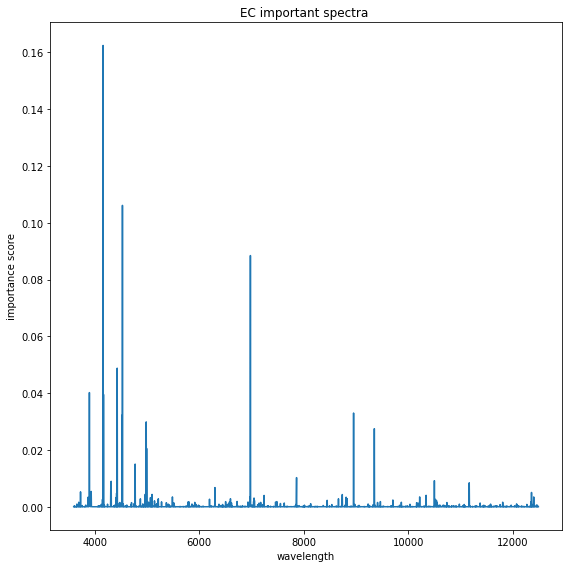

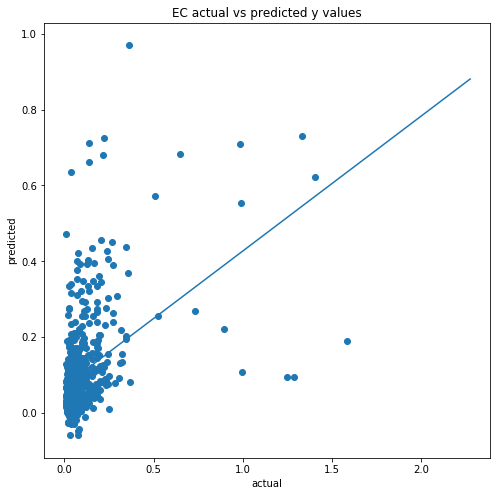

Training model for M3 Ca.
1277 samples available.
CV r^2 score: 0.707
M3 Ca RMSE percentage = 0.10982019474754182


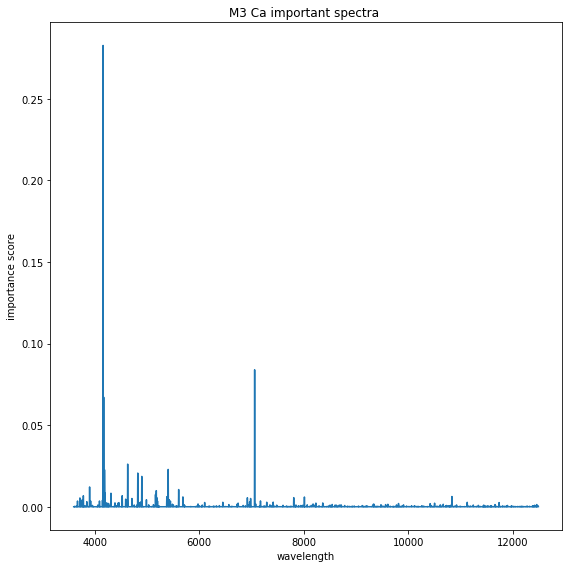

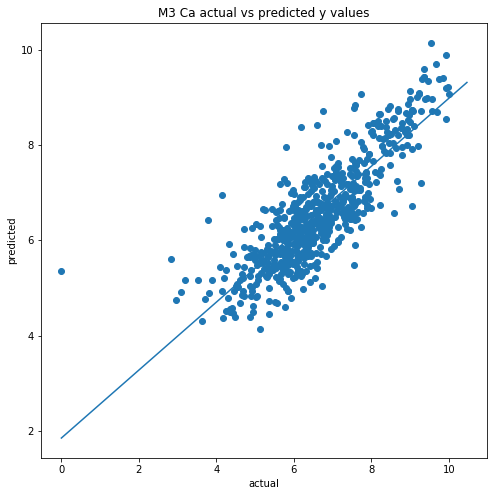

Training model for M3 K.
1277 samples available.
CV r^2 score: 0.495
M3 K RMSE percentage = 0.14092621544126424


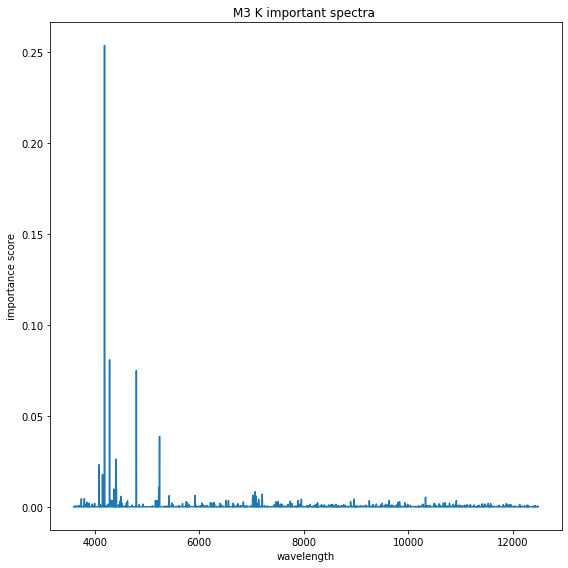

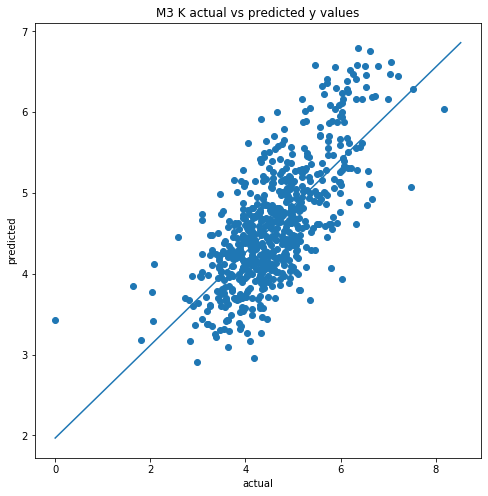

Training model for M3 Mg.
1277 samples available.
CV r^2 score: 0.682
M3 Mg RMSE percentage = 0.11683961815561264


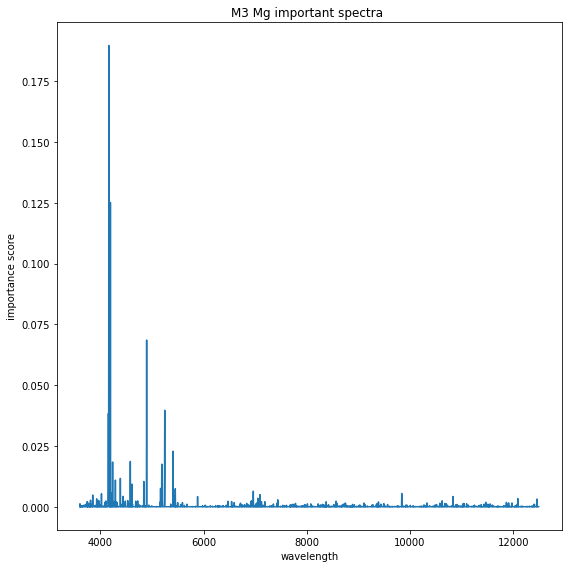

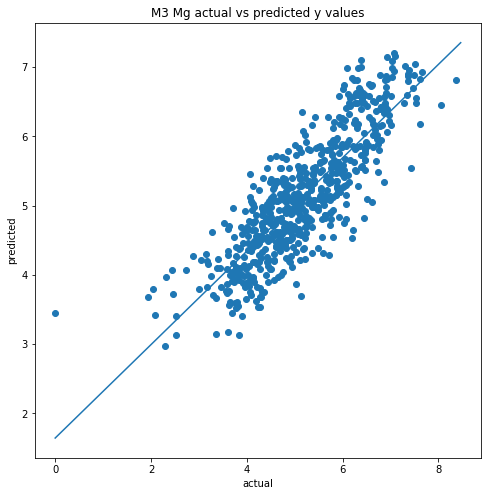

Training model for M3 P.
1277 samples available.
CV r^2 score: 0.214
M3 P RMSE percentage = 0.41893555084175255


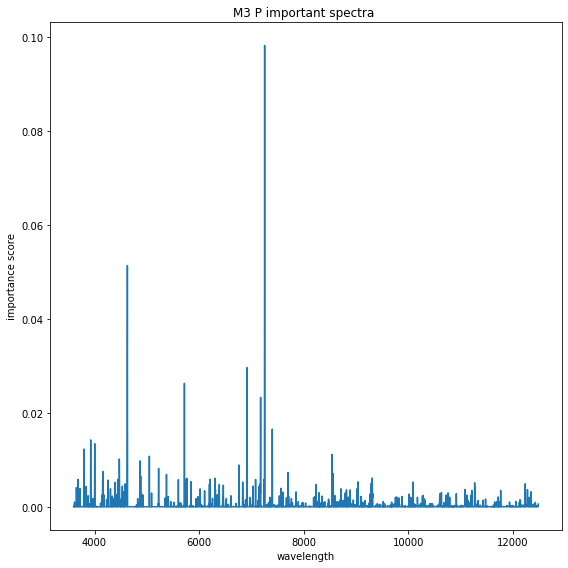

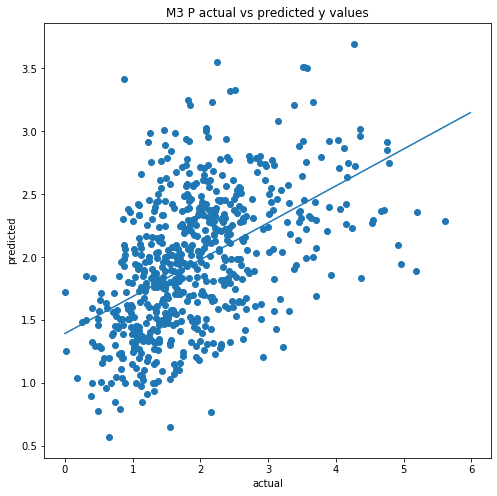

Training model for PH.
1277 samples available.
CV r^2 score: 0.559
PH RMSE percentage = 0.046597156046327345


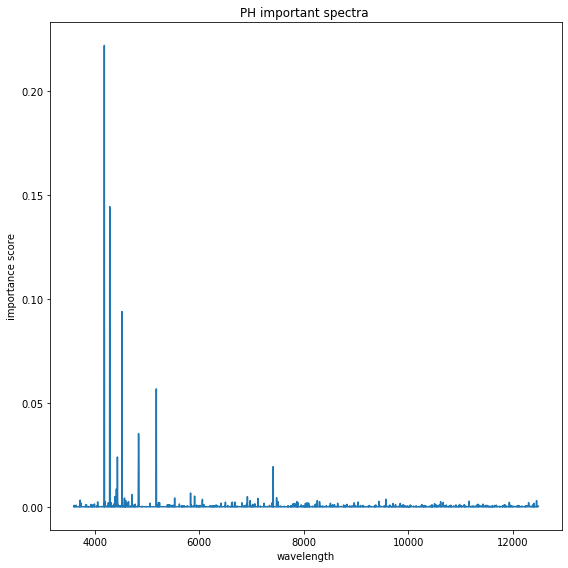

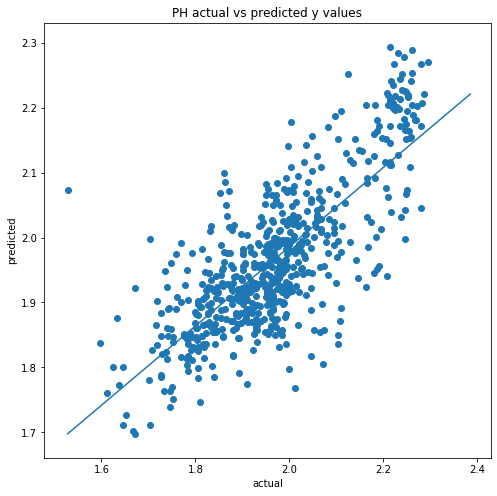

CPU times: user 42min 28s, sys: 759 ms, total: 42min 29s
Wall time: 42min 27s


In [16]:
%%time
models = []
for target in columns:
    #set the target value of interest
    Y_COLUMN = target
    
    #initialize the vanilla xgboost model
    model, r_squared = basic_xgboost3(X_train, y_train[Y_COLUMN])
    
    #fit and predict it for the target variable
    model.fit(X_train, y_train[Y_COLUMN])
    yhat = model.predict(X_validate)
    
    #evaluate results with root mean square error percentage
    rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))
    _mean = y[Y_COLUMN].mean()
    rmsep = rmse / _mean
    print(f'{Y_COLUMN} RMSE percentage = {rmsep}')
    
    #plot the feature importance
    feature_importance = model.feature_importances_
    
    fig, ax = plt.subplots(figsize=(8,8))
    plt.plot(column_vals, feature_importance)
    #plt.xticks(feature_importance, , rotation='vertical')
    plt.xlabel('wavelength')
    plt.ylabel('importance score')
    plt.title(f'{Y_COLUMN} important spectra ')
    plt.tight_layout()
    plt.show()
    
    #plot the predicted to true
    fig, ax = plt.subplots(figsize=(8,8))
    plt.scatter(y_test[Y_COLUMN], yhat)
    plt.title(f'{Y_COLUMN} actual vs predicted y values')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    
    #plot r squared
    plt.plot(np.unique(y[Y_COLUMN]), np.poly1d(np.polyfit(y_test[Y_COLUMN], yhat, 1))(np.unique(y[Y_COLUMN])))
    plt.show()
    